In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# 데이터프레임 합치기
path = '/content/drive/MyDrive/data'
files = os.listdir(path)
files.sort()
df = pd.DataFrame()
for file in files:
  file_path = os.path.join(path,file)
  month = pd.read_csv(file_path, encoding='ISO-8859-1')
  df = pd.concat([df, month], ignore_index=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060 entries, 0 to 4059
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     4060 non-null   int64 
 1   id             4060 non-null   int64 
 2   kw_location    4060 non-null   object
 3   time_location  4060 non-null   object
 4   created_date   4060 non-null   object
 5   period         4060 non-null   object
 6   1              4060 non-null   object
 7   2              4060 non-null   object
 8   3              4060 non-null   object
 9   4              4060 non-null   object
 10  5              4060 non-null   object
 11  6              4060 non-null   object
 12  7              4060 non-null   object
 13  8              4060 non-null   object
 14  9              4060 non-null   object
 15  10             4060 non-null   object
 16  11             4060 non-null   object
 17  12             4060 non-null   object
 18  13             4060 non-null

In [23]:
# year month 열 합치기
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str).str.zfill(2)

# 필요없는 행 drop
df = df.drop(['Unnamed: 0', 'id', 'time_location', 'created_date','year','month','period'], axis = 1)

In [ ]:
df

,kw_location,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,year_month
0,US,Nichelle Nichols,UFC,Lil Uzi Vert,England vs Germany,Bill Russell death,Tony Finau,Man United vs Rayo Vallecano,Pat Carroll,Ric Flair Last Match,...,PSG,Liverpool vs Strasbourg!,Kenan Thompson SNL,MLB trade deadline,Mandy Moore,McKinney Fire map,Hungarian Grand Prix,UFC 277,Powerball,2022-08
1,UK,Love Island vote,Alex Yee,Celtic,Matt Walls crash,Beth Mead,Nichelle Nichols,Leeds United,Love Island final 2022,Pétanque,...,PSG vs Nantes,Fara Williams,Becky Hill,Fran Kirby,UFC 277,Real Madrid vs Juventus,Ny Red Bulls vs Barcelona,Bill Russell,Archie Battersbee,2022-08
2,DE,Ivana Trump,Fussball EM,Kosovo,Hertha BSC,Nichelle Nichols,Schalke,Jule Brand,Magull,Bill Russell,...,Claudia Obert,Oberachern,PSG,Frauenfußball,Tina Ruland,Dieter Wedel,Waldhof Mannheim,Joe Biden,Deutschland Fußball,2022-08
3,FR,1er aout,Mano,Jeanfi Janssens,Prince William,Nichelle Nichols,Jeanne Moreau,1er aout fete,Guy Carlier,OM,...,Aubais,Manchester United \u2013 Rayo,Pétanque,Florent Pagny,Kosovo,Bill Russell,Ligue 1,Christophe Izard,Taiwan,2022-08
4,NL,Nichelle Nichols,Ihattaren,F1 Hongarije,Wiegman,Almere Ajax,Manchester United,Kosovo,Klaas Otto,PSG,...,Jan Steeman,Aziatische hoornaar,Vitesse,Ajax,Annemiek van Vleuten,Maxime Meiland,Wibi Soerjadi,Ajax PSV,Formule 1 Hongarije,2022-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4055,DE,Füllkrug,One Piece Netflix,Bonucci,Mitch McConnell,UEFA champions league,Champions League Auslosung,Oliver Pocher,Hurrikan Idalia Florida,Bachelorette,...,Unfall A2,Till Lindemann,Bürgergeld,US Open,Kindergrundsicherung,US Open 2023,Lisa Paus,Jürgen von der Lippe,Mallorca Unwetter,2023-08
4056,FR,Liste Deschamps,Novak Djokovic,Lenny Martinez,Supreme,Ansu Fati,France \u2013 Iran,Cyril Hanouna,Gad Elmaleh,Equipe de France,...,Balogun,PSV,Clement Beaune,Volley : France,Gabon,Tirage Ligue des champions,One Piece Netflix,The Voice Kids,Barcola,2023-08
4057,NL,Jan Jongbloed,Lavoie,Carel Eiting,Tong Tong Fair,Starfield review,PSV,Saibari PSV,Gabon,Ruud de Wild,...,Fairphone,Orkaan Florida,Florida,Sam Lammers,Johan Derksen,Blauwe maan,US Open,Sparta,Heerenveen,2023-08
4058,IT,Sorteggi Champions League,Incidente ferroviario,One Piece Netflix,Guendouzi,Giorgia Meloni Caivano,Lady Diana,Amrabat,Estrazioni Lotto SuperEnalotto,UEFA,...,Supreme,Nainggolan,Mongolia,Wozniacki,Eric Garcia,Cremonese,Raoul Bova,PSV,Everton,2023-08


In [ ]:
# 국가별 나누기
us_df = df[df['kw_location'] == 'US']
uk_df = df[df['kw_location'] == 'UK']
fr_df = df[df['kw_location'] == 'FR']
nl_df = df[df['kw_location'] == 'NL']
aus_df = df[df['kw_location'] == 'AUS']

### 1. 국가별 전체 기간 중 1등을 가장 많이 한 검색어


In [ ]:
countries = ['US','UK','FR','NL','AUS']
firsts = {}
for i, name in enumerate([us_df, uk_df, fr_df, nl_df, aus_df]):
  most_common = name['1'].value_counts()
  firsts[countries[i]] = [most_common.index[0], most_common.iloc[0]]

In [ ]:
firsts

{'US': ['Lakers', 13],
 'UK': ['Andy Murray', 7],
 'FR': ['MotoGP', 5],
 'NL': ['Ajax', 11],
 'AUS': ['UFC', 10]}

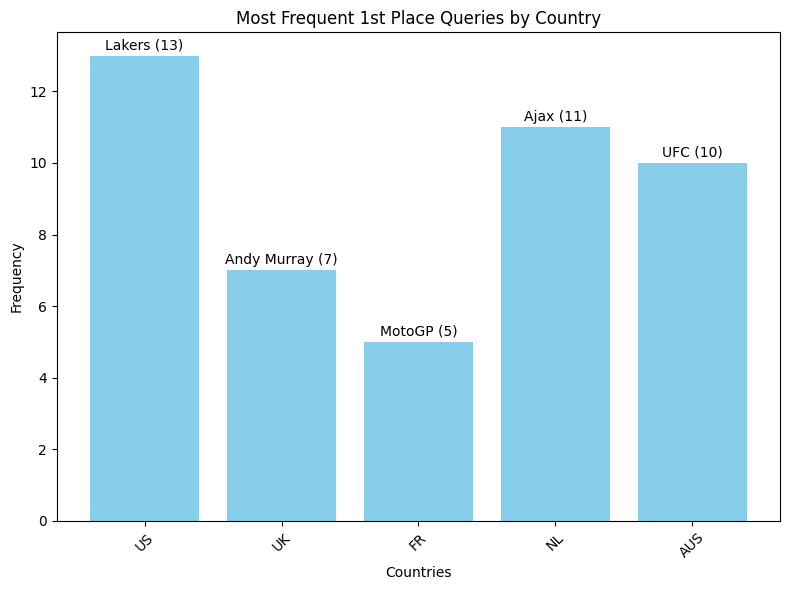

In [ ]:
# Extract countries and queries
countries = list(firsts.keys())
queries = [entry[0] for entry in firsts.values()]
counts = [entry[1] for entry in firsts.values()]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(countries, counts, color='skyblue')
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.title('Most Frequent 1st Place Queries by Country')
plt.xticks(rotation=45)

# Annotate the queries on the plot
for i, count in enumerate(counts):
    plt.text(countries[i], count + 0.1, f'{queries[i]} ({count})', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 2. 국가별 월별 일간 검색어 top 1

In [ ]:
us_top1 = us_df.groupby(['year_month'])['1'].apply(lambda x: x.value_counts().index[0]).reset_index(name='top1')
uk_top1 = uk_df.groupby(['year_month'])['1'].apply(lambda x: x.value_counts().index[0]).reset_index(name='top1')
fr_top1 = fr_df.groupby(['year_month'])['1'].apply(lambda x: x.value_counts().index[0]).reset_index(name='top1')
nl_top1 = nl_df.groupby(['year_month'])['1'].apply(lambda x: x.value_counts().index[0]).reset_index(name='top1')
aus_top1 = aus_df.groupby(['year_month'])['1'].apply(lambda x: x.value_counts().index[0]).reset_index(name='top1')
# 횟수
# top_1_keyword_counts_by_month = us_df.groupby(['year_month'])['1'].apply(lambda x: x.value_counts().max()).reset_index(name='count')
# result_df = pd.merge(top_1_keywords_by_month, top_1_keyword_counts_by_month, on='year_month')
# result_df

In [ ]:
us_top1

,year_month,top1
0,2022-08,Deshaun Watson
1,2022-09,Aaron Judge
2,2022-10,Lakers
3,2023-01,Dallas Cowboys
4,2023-02,Lakers
5,2023-03,Tom Sizemore
6,2023-04,Lakers
7,2023-05,Memorial Day
8,2023-06,Don Lemon
9,2023-07,Powerball


In [ ]:
merged_df = pd.concat([us_top1, uk_top1, fr_top1, nl_top1, aus_top1], axis=1)
merged_df.set_index('year_month', inplace=True)
merged_df.index = ['2022-08','2022-09','2022-10','2023-01','2023-02','2023-03','2023-04','2023-05','2023-06','2023-07','2023-08']
merged_df.columns = ['US', 'UK', 'FR', 'NL', 'AUS']
merged_df.T

,2022-08,2022-09,2022-10,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08
US,Deshaun Watson,Aaron Judge,Lakers,Dallas Cowboys,Lakers,Tom Sizemore,Lakers,Memorial Day,Don Lemon,Powerball,Taylor Swift
UK,Trump,Hocus Pocus 2,Slim Dusty,Justin Roiland,Constance Marten,St David's Day,Alan Rickman,Jock Zonfrillo,Andy Murray,Women's World Cup,Football Women's World Cup 2023
FR,Sylvie Tellier Miss France,Coolio,Rihanna,Ken Block,Turquie,Brendan Fraser,Jour de la Terre,Fête du travail,Wagner,Var parc aquatique structure gonflable,Inter Miami
NL,Manchester United,Mobilisatie,F1 Mexico,Ken Block,Noorderlicht Nederland,Johan Leysen,Barcelona,Luca Brecel,Alpe d'HuZes,Inter Miami,Angus Cloud
AUS,UFC,Roger Federer,Man City vs Brighton,Brighton vs Liverpool,Atomic Heart,Elon Musk,Outlook,Earthquake Melbourne,Nations League,F1,Lil Tay


### 3. 한 국가에서 월별 top 10에 가장 많이 올라온 검색어 5개
- 미국

In [ ]:
us_top10 = us_df.groupby("year_month")[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']].agg(list).reset_index()

us_top10['merged'] =[[]]*11
for i in range(1,11):
  us_top10['merged'] += us_top10[f'{i}']

us_top10


,year_month,1,2,3,4,5,6,7,8,9,10,merged
0,2022-08,"[Nichelle Nichols, Deshaun Watson, Deshaun Wat...","[UFC, Spelman College, Taiwan, Flightradar24, ...","[Lil Uzi Vert, August, al-Zawahiri, Tiger, Ari...","[England vs Germany, Bill Russell, Trey Mancin...","[Bill Russell death, Nichelle Nichols, Nicki m...","[Tony Finau, UFC, Spelman College, Naomi Judd,...","[Man United vs Rayo Vallecano, Pat Carroll, An...","[Pat Carroll, Ric Flair Last Match, August, Ta...","[Ric Flair Last Match, Lil Uzi Vert, Premier P...","[Lil Durk, ENGLAND vs GERMANY, India vs West I...","[Nichelle Nichols, Deshaun Watson, Deshaun Wat..."
1,2022-09,"[Man City vs nottm Forest, Timmy Trumpet, Dono...","[Mary Peltola, Russell Wilson, Penn State foot...","[Arsenal vs Aston Villa, Penn State football, ...","[West Ham vs Tottenham, Circle K, Manchester U...","[Toulouse vs PSG, Armie Hammer, Venus Williams...","[Princess Diana, Castaic fire, College footbal...","[Winnie the Pooh: Blood and Honey, DMX, Pete D...","[Jalen Reagor, Man City vs nottm Forest, Russe...","[PSG, Mary Peltola, Pitt vs WVU, Biden, Elvis,...","[Rings of Power, Arsenal vs Aston Villa, Circl...","[Man City vs nottm Forest, Timmy Trumpet, Dono..."
2,2022-10,"[Hocus Pocus 2, Liverpool vs Brighton, Georgia...","[Disney Plus, Crystal Palace vs Chelsea, Arsen...","[Dua Lipa, FAFSA, Oklahoma football, McDonald'...","[UCLA football, Kentucky football, Antonio Bro...","[Mariners, Arsenal, Liverpool vs Brighton, Cel...","[Premier League, Antonio Brown, Crystal Palace...","[Warriors, Barcelona, Bryce Young, A Christmas...","[Blake Griffin, Dish Network, PSG, ZZ Top, Kri...","[Nick Cannon, Bundesliga, Jimmy Carter, Bronco...","[Community movie, Hocus Pocus 2, Illinois foot...","[Hocus Pocus 2, Liverpool vs Brighton, Georgia..."
3,2023-01,"[Ohio State football, Happy New Year! 2023, Ea...","[Pope Benedict, Tottenham vs Aston Villa, 49er...","[Dolly Parton, Anita Pointer, Steelers, BRENTF...","[Premier League, Luka Doncic, Happy New Year! ...","[Man City vs Everton, Nottm Forest vs Chelsea,...","[Wolves vs Man United, Rose Bowl Parade, Kansa...","[Ryan Seacrest, Modest Mouse, Seahawks, Eagles...","[Sia, Robert Griffin III, Raiders, Tampa Bay B...","[Sheryl Crow, Ohio State Football, Detroit Lio...","[New Year's Eve countdown, Pope, Benedict, Gia...","[Ohio State football, Happy New Year! 2023, Ea..."
4,2023-02,"[R. Kelly Chicago, Tom Brady, Tom Brady, Bruin...","[Green comet, Beyonce Renaissance tour, Beyonc...","[Hulk Hogan, Josh Sills, Josh Sills, Rita Ora,...","[Denver Broncos, Ozzy Osbourne, Samsung, Groun...","[Jorginho, Wakanda Forever, Black History Mont...","[Morgan Wallen, Bad Boys 4, Celtics, Beyonce R...","[Duke Basketball, Green comet, Ice storm warni...","[Newcastle vs Southampton, Denver Broncos, Met...","[Lakeland shooting, Nikki Haley, Groundhog Day...","[AMD stock, Hulk Hogan, Wakanda Forever, Black...","[R. Kelly Chicago, Tom Brady, Tom Brady, Bruin..."
5,2023-03,"[Tom Sizemore, Lakers, Premier League, Knicks,...","[Chicago mayoral election, Warriors, Kevin Dur...","[Bristol City vs Man City, Clippers, Liverpool...","[Elden Ring DLC, Women's History Month, Warrio...","[Bucks, Dave Grohl, Sheffield United vs Totten...","[Memphis Grizzlies, Jonathan Quick, Tesla inve...","[Hoda Kotb, Darren Till, Jupiter and Venus, Ke...","[Duke basketball, Ed Sheeran, Women's History ...","[Mandalorian season 3, Chicago mayoral electio...","[Bruins, Mandalorian season 3, Clippers, Celti...","[Tom Sizemore, Lakers, Premier League, Knicks,..."
6,2023-04,"[Little Rock tornado, Premier League, Australi...","[South Carolina women's basketball, Arsenal, J...","[Andrew Tate, Barcelona, Lil Yachty, Asa Hutch...","[Chicago weather, Chelsea, Premier League, Nei...","[Earthquake, Taylen Mosley, UConn vs Miami, Ma...","[Joni Mitchell, Arsenal vs Leeds United, Flori...","[Knicks, Iowa women's basketball, Bundesliga, ...","[Apollo Theater, Tornado, Chelsea, The thing, ...","[Trans Day of Visibility, Andrew Tate, Ap

In [ ]:
from collections import Counter

# 각 월별 검색어 횟수 계산
monthly_counts = {month: Counter(queries) for month, queries in zip(us_top10['year_month'], us_top10['merged'])}

# 상위 5개 검색어 찾기
top_5_queries = {}
top_5_counts = {}
for month, counts in monthly_counts.items():
    top_5_queries[month] = [query for query, count in counts.most_common(5)]
    top_5_counts[month] = [[query, count] for query, count in counts.most_common(5)]

In [ ]:
top5_df = pd.DataFrame(top_5_counts)
top5_df

,2022-08,2022-09,2022-10,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08
0,"[Deshaun Watson, 6]","[Aaron Judge, 8]","[Lakers, 10]","[Lakers, 11]","[Real Madrid, 9]","[Celtics, 14]","[Lakers, 13]","[Dallas Stars, 7]","[Joe Biden, 6]","[Powerball, 10]","[Inter Miami, 7]"
1,"[Manchester United, 6]","[Eagles, 5]","[Powerball, 6]","[Warriors, 10]","[Lakers, 7]","[Warriors, 10]","[Knicks, 10]","[Jayson Tatum, 7]","[Damian Lillard, 6]","[Wimbledon, 6]","[Taylor Swift, 6]"
2,"[Chicago Bears, 6]","[Inter, 4]","[Broncos, 5]","[Dallas Cowboys, 6]","[Celtics, 7]","[Clippers, 10]","[Warriors, 8]","[Kraken, 5]","[Florida Panthers, 5]","[Inter Miami, 6]","[Donald Trump, 5]"
3,"[Premier League, 5]","[UFC, 4]","[Warriors, 5]","[Bengals, 6]","[Warriors, 6]","[Lamar Jackson, 7]","[Kraken, 8]","[Arsenal, 5]","[Djokovic, 5]","[Djokovic, 5]","[Barcelona, 5]"
4,"[Anne Heche, 5]","[NFL, 4]","[Celtics, 4]","[PSG, 6]","[Bruins, 5]","[Knicks, 5]","[Nuggets, 8]","[Memorial Day, 5]","[Scoot Henderson, 5]","[Carlee Russell, 5]","[Manchester United, 4]"


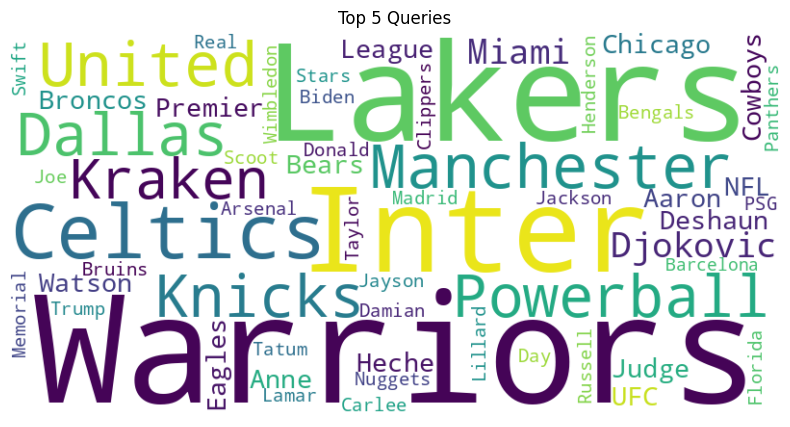

In [ ]:
from wordcloud import WordCloud

# 시각화할 데이터
top_keywords = [keyword for queries in top_5_queries.values() for keyword in queries]

# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_keywords))

# 워드 클라우드 표시
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 5 Queries')
plt.show()

**결과**  
- 야구 - Chicago Bears, Knicks  
- 농구 - Lakers, Nuggets, Celtics, Warriors  
- 축구 - Real Madrid, Premier League, Inter Miami  
- 테니스 - Wimbledon, Djokovic   
- 풋볼 - Eagles, NFL  
등 스포츠 관련 검색어가 많았고,
Joe Biden, Donald Trump 등 정치인, Taylor Swift, Anne Heche 등 연예인이 있었다.